<Figure size 10000x4800 with 0 Axes>

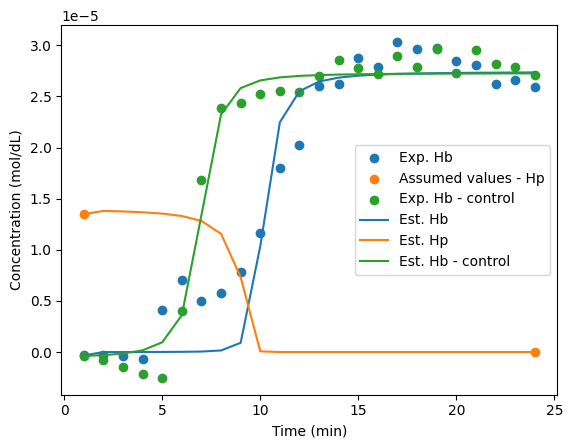

<Figure size 10000x4800 with 0 Axes>

In [39]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import Bounds
from plotdf import plotdf

data = pd.read_excel('data.xlsx')
s=1.38476998e-05
mu=7
time = np.linspace(1, 24, 24)
hbin = 2.7E-5
hpin = hbin/2
hpx = [1, 24]
hpy = [hpin, 0]
ic = ([data.loc[0, "hpadj mol/dL"], hpin, data.loc[0, "cadj mol/dL"]])
ac = (10E5, s*3, 8)

def func(x, t, kr, sB, muB):
    B, P, C = x
    dB = - kr * B * P + sB/((((t-muB)**2)+1)**(3/2))
    dP = - kr * B * P
    dC = s/((((t-mu)**2)+1)**(3/2))
    return(dB, dP, dC)

def func2(B, P, t, kr, sB, muB):
    dB = - kr * B * P + sB/((((t-muB)**2)+1)**(3/2))
    dP = - kr * B * P
    dC = s/((((t-mu)**2)+1)**(3/2))
    return(dB, dP, dC)

fitdata = odeint(func, ic, data["time"], args=(1.14609260e+06, 2.06724401e-05, 9.82450961e+00))
plt.scatter(data["time"], data['hpadj mol/dL'], label = "Exp. Hb")
plt.scatter(hpx, hpy, label = "Assumed values - Hp")
plt.scatter(data["time"], data['cadj mol/dL'], label = "Exp. Hb - control")
plt.plot(data["time"], fitdata[:,0], label = "Est. Hb")
plt.plot(data["time"], fitdata[:,1], label = "Est. Hp")
plt.plot(data["time"], fitdata[:,2], label = "Est. Hb - control")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (mol/dL)")
plt.legend(loc = "right")
plt.figure(figsize = (100, 48))

<Figure size 10000x4800 with 0 Axes>

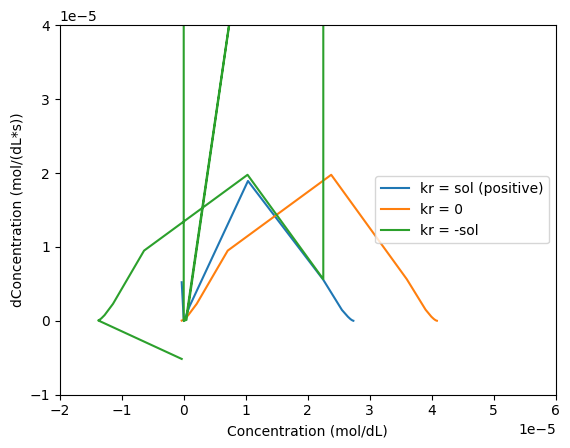

<Figure size 10000x4800 with 0 Axes>

In [73]:
dHb2 = np.array(func2(B = fitdata[:,0], P = fitdata[:,1], t = data["time"], kr = 1.14609260e+06, sB = 2.06724401e-05, muB = 9.82450961e+00))
fitdata_kr0 = odeint(func, ic, data["time"], args=(0, 2.06724401e-05, 9.82450961e+00))
dHb0 = np.array(func2(B = fitdata_kr0[:,0], P = fitdata_kr0[:,1], t = data["time"], kr = 0, sB = 2.06724401e-05, muB = 9.82450961e+00))
fitdata_krneg = odeint(func, ic, data["time"], args=(-1.14609260e+06, 2.06724401e-05, 9.82450961e+00))
dHbneg = np.array(func2(B = fitdata_krneg[:,0], P = fitdata_krneg[:,1], t = data["time"], kr = -1.14609260e+06, sB = 2.06724401e-05, muB = 9.82450961e+00))
plt.plot(fitdata[:,0], dHb2[0, 0:24], label = "kr = sol (positive)")
plt.plot(fitdata_kr0[:,0], dHb0[0, 0:24], label = "kr = 0")
plt.plot(fitdata_krneg[:,0], dHbneg[0, 0:24], label = "kr = -sol")
plt.xlabel("Concentration (mol/dL)")
plt.ylabel("dConcentration (mol/(dL*s))")
plt.xlim(-2E-5, 6E-5)
plt.ylim(-1E-5, 4E-5)
plt.legend(loc = "right")
plt.figure(figsize = (100, 48))

<Figure size 10000x4800 with 0 Axes>

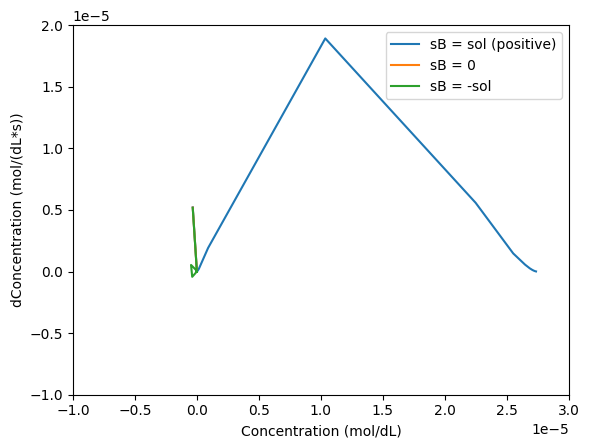

<Figure size 10000x4800 with 0 Axes>

In [74]:
dHb2 = np.array(func2(B = fitdata[:,0], P = fitdata[:,1], t = data["time"], kr = 1.14609260e+06, sB = 2.06724401e-05, muB = 9.82450961e+00))
fitdata_kr0 = odeint(func, ic, data["time"], args=(1.14609260e+06, 0, 9.82450961e+00))
dHb0 = np.array(func2(B = fitdata_kr0[:,0], P = fitdata_kr0[:,1], t = data["time"], kr = 1.14609260e+06, sB = 0, muB = 9.82450961e+00))
fitdata_krneg = odeint(func, ic, data["time"], args=(1.14609260e+06, -2.06724401e-05, 9.82450961e+00))
dHbneg = np.array(func2(B = fitdata_krneg[:,0], P = fitdata_krneg[:,1], t = data["time"], kr = 1.14609260e+06, sB = -2.06724401e-05, muB = 9.82450961e+00))
plt.plot(fitdata[:,0], dHb2[0, 0:24], label = "sB = sol (positive)")
plt.plot(fitdata_kr0[:,0], dHb0[0, 0:24], label = "sB = 0")
plt.plot(fitdata_krneg[:,0], dHbneg[0, 0:24], label = "sB = -sol")
plt.xlabel("Concentration (mol/dL)")
plt.ylabel("dConcentration (mol/(dL*s))")
plt.xlim(-1E-5, 3E-5)
plt.ylim(-1E-5, 2E-5)
plt.legend(loc = "upper right")
plt.figure(figsize = (100, 48))

<Figure size 10000x4800 with 0 Axes>

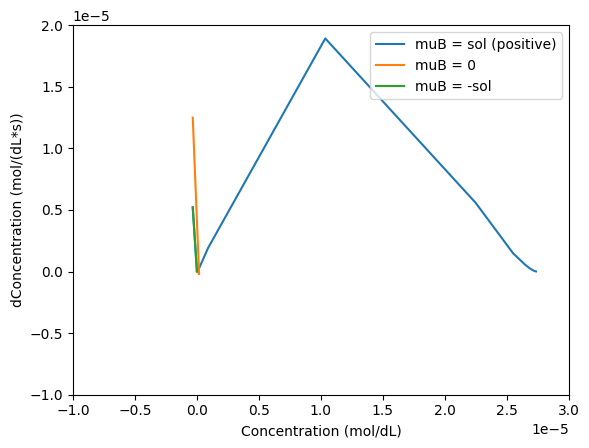

<Figure size 10000x4800 with 0 Axes>

In [75]:
dHb2 = np.array(func2(B = fitdata[:,0], P = fitdata[:,1], t = data["time"], kr = 1.14609260e+06, sB = 2.06724401e-05, muB = 9.82450961e+00))
fitdata_kr0 = odeint(func, ic, data["time"], args=(1.14609260e+06, 2.06724401e-05, 0))
dHb0 = np.array(func2(B = fitdata_kr0[:,0], P = fitdata_kr0[:,1], t = data["time"], kr = 1.14609260e+06, sB = 2.06724401e-05, muB = 0))
fitdata_krneg = odeint(func, ic, data["time"], args=(1.14609260e+06, 2.06724401e-05, -9.82450961e+00))
dHbneg = np.array(func2(B = fitdata_krneg[:,0], P = fitdata_krneg[:,1], t = data["time"], kr = 1.14609260e+06, sB = 2.06724401e-05, muB = -9.82450961e+00))
plt.plot(fitdata[:,0], dHb2[0, 0:24], label = "muB = sol (positive)")
plt.plot(fitdata_kr0[:,0], dHb0[0, 0:24], label = "muB = 0")
plt.plot(fitdata_krneg[:,0], dHbneg[0, 0:24], label = "muB = -sol")
plt.xlabel("Concentration (mol/dL)")
plt.ylabel("dConcentration (mol/(dL*s))")
plt.xlim(-1E-5, 3E-5)
plt.ylim(-1E-5, 2E-5)
plt.legend(loc = "upper right")
plt.figure(figsize = (100, 48))